In [7]:
# 아래와 같이 필요한 라이브러리를 임포트 합니다.
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 소수점 3자리 숫자까지 표시
%precision 3

'%.3f'

df = pd.read_csv(r'C:\Users\MINSEOK\Downloads\Sleep_Efficiency.csv')

In [205]:
#df

In [201]:
#Sleep Quality Score 계산방식
df['Sleep Quality Score'] = (df['Sleep duration'] * 0.2) + (df['Sleep efficiency'] * 0.2) + (df['Deep sleep percentage'] * 0.2) + (df['REM sleep percentage'] * 0.15) + ((100 - df['Light sleep percentage']) * 0.15) +((100 - df['Awakenings']) * 0.1)

In [178]:
selected_cols = ['Smoking status', 'Exercise frequency','Caffeine consumption', 'Alcohol consumption','Sleep Quality Score']
df_selected = df[selected_cols].copy()

In [180]:
df_selected

,Smoking status,Exercise frequency,Caffeine consumption,Alcohol consumption,Sleep Quality Score
0,Yes,3.0,0.0,0.0,41.276
1,Yes,3.0,0.0,3.0,26.732
2,No,3.0,0.0,0.0,42.178
3,Yes,1.0,50.0,5.0,26.652
4,No,3.0,0.0,3.0,38.802
...,...,...,...,...,...
447,No,5.0,0.0,0.0,38.232
448,No,3.0,25.0,0.0,39.298
449,Yes,0.0,NaN,3.0,28.910
450,No,3.0,0.0,0.0,41.852


---

## 흡연과 수면의 질의 관계

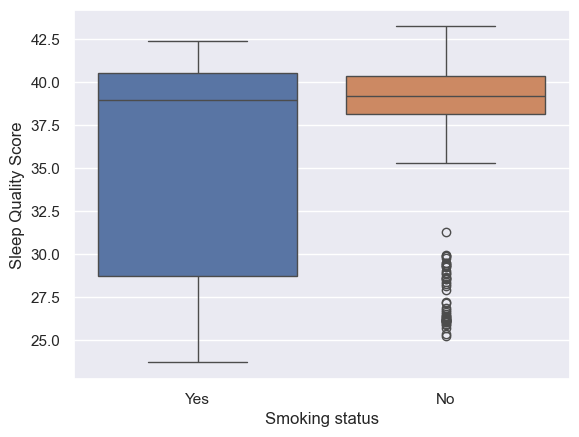

In [208]:
sns.boxplot(df_selected, x = 'Smoking status', y ='Sleep Quality Score', hue = 'Smoking status')
plt.show()

---

## 운동빈도와 수면의 질의 관계

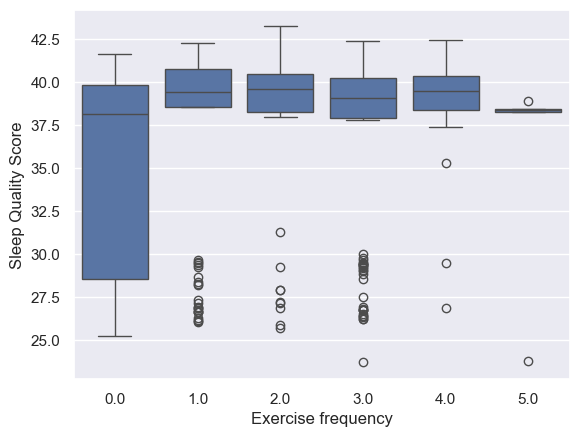

In [212]:
sns.boxplot(data = df_selected, x = 'Exercise frequency', y ='Sleep Quality Score')
plt.show()

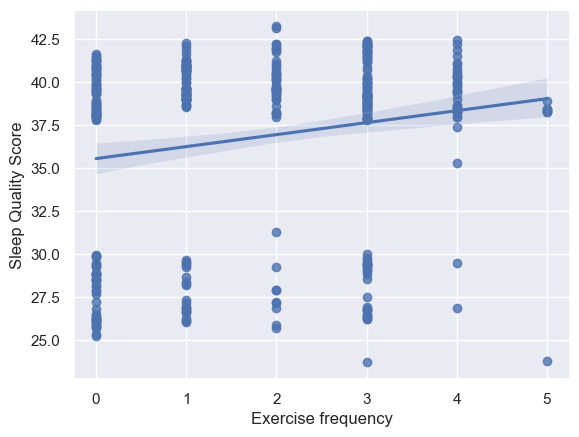

In [166]:
sns.regplot(data = df_selected, x = 'Exercise frequency', y ='Sleep Quality Score')
plt.show()

---

## 카페인 소비량과 수면의 질의 관계

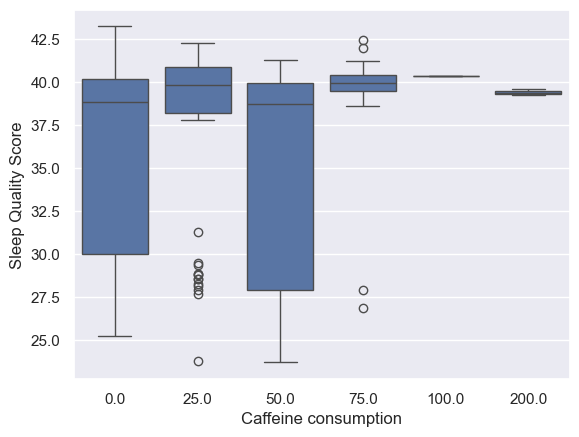

In [168]:
sns.boxplot(data = df_selected, x = 'Caffeine consumption', y = 'Sleep Quality Score')
plt.show()

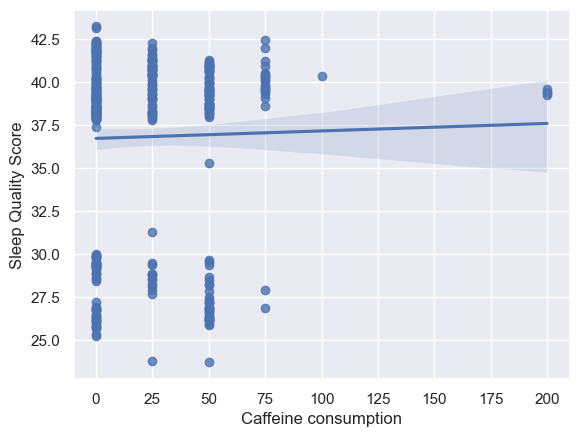

In [170]:
sns.regplot(data = df_selected, x = 'Caffeine consumption', y = 'Sleep Quality Score')
plt.show()

---

## 알코올 소비량과 수면의 질의 관계

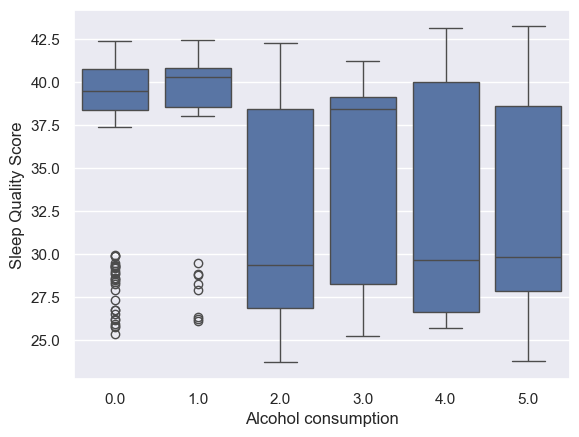

In [17]:
sns.boxplot(data = df, x = 'Alcohol consumption', y = 'Sleep Quality Score')
plt.show()

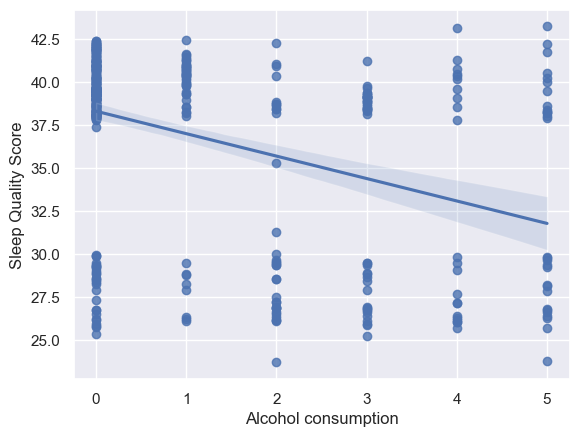

In [176]:
sns.regplot(data = df, x = 'Alcohol consumption', y = 'Sleep Quality Score')
plt.show()

---

## 각 변수와의 관계에서 흡연 여부를 구분했을 때

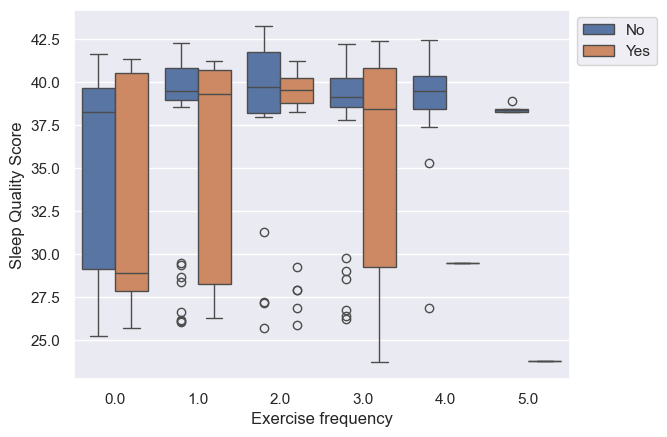

In [182]:
sns.boxplot(data = df, x = 'Exercise frequency', y = 'Sleep Quality Score', hue = 'Smoking status')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

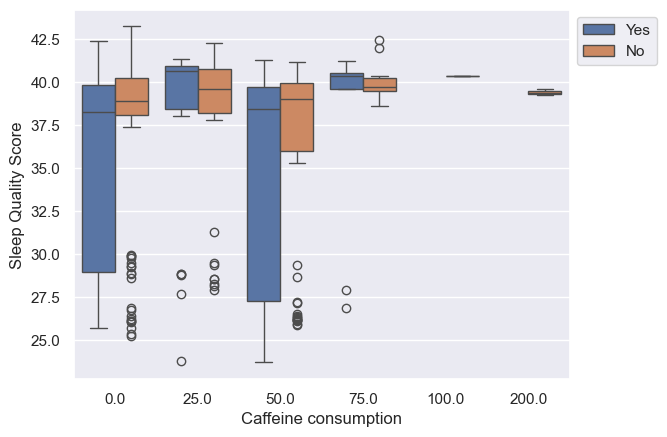

In [184]:
sns.boxplot(data = df, x = 'Caffeine consumption', y = 'Sleep Quality Score', hue = 'Smoking status')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

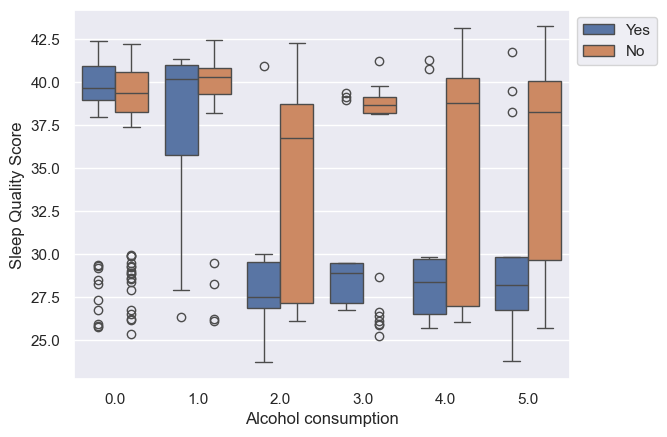

In [23]:
sns.boxplot(data = df, x = 'Alcohol consumption', y = 'Sleep Quality Score', hue = 'Smoking status')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

---

---

In [114]:
df_selected['Smoking status'] = df_selected['Smoking status'].map({'Yes': 1, 'No': 0})

In [116]:
df_selected.corrwith(df['Sleep Quality Score'], numeric_only = True)

Caffeine consumption    0.024391
Alcohol consumption    -0.391562
Exercise frequency      0.183654
Smoking status         -0.222916
Sleep Quality Score     1.000000
dtype: float64